# ARIMA

In [146]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from arch import arch_model
import warnings
warnings.filterwarnings('ignore')
import sys
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA

In [147]:
i_vix =pd.read_excel('India_VIX.xlsx') 
nif = pd.read_excel('NIFTY.xlsx') 
z = stats.norm.ppf(0.99)

current_asset_value_nif = 1
units_nif = 1/nif['Close'].iloc[-1]

In [148]:
i_vix.head()

,Date,Open,High,Low,Close,Prev. Close,Change,% Change
0,2009-03-02,43.19,43.38,41.44,43.17,-,0.00,0.00
1,2009-03-03,43.17,43.90,41.20,43.89,43.17,0.72,1.67
2,2009-03-04,43.89,43.89,42.16,42.52,43.89,-1.37,-3.12
3,2009-03-05,42.52,42.71,40.41,41.49,42.52,-1.03,-2.42
4,2009-03-06,41.49,41.49,37.57,38.16,41.49,-3.33,-8.03


In [149]:
i_vix = (i_vix.set_index('Date'))
i_vix = i_vix['Close']

In [150]:
stdev_nif = i_vix/(100*np.sqrt(365)) 

In [151]:
stdev_nif

Date
2009-03-02    0.022596
2009-03-03    0.022973
2009-03-04    0.022256
2009-03-05    0.021717
2009-03-06    0.019974
                ...   
2021-04-05    0.011104
2021-04-06    0.010908
2021-04-07    0.010598
2021-04-08    0.010632
2021-04-09    0.010356
Name: Close, Length: 3001, dtype: float64

#### Nifty

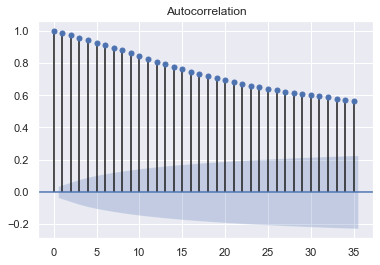

In [152]:
'''
NIFTY
'''
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stdev_nif)
plt.show()

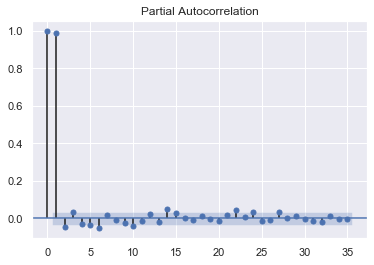

In [153]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(stdev_nif)
plt.show()

In [154]:
from statsmodels.tsa.stattools import adfuller
X = (stdev_nif)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -5.089934
p-value: 0.000015
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [155]:
'''
Fit on complete dataset
'''
p_values = [1]
d_values = [0]
q_values = [0]
train = stdev_nif

for p in p_values:
    for d in d_values:
        for q in q_values:
            history = [x for x in train]
            for t in range(1):
                order = (p,d,q)
                model = ARIMA(history, order=order)
                model_fit = model.fit()
                output = model_fit.forecast()
                yhat = output[0]
                arima_full_nif = (yhat)


In [158]:
'''
Rolling window ~ 5years
'''
p_values = [1]
d_values = [0]
q_values = [0]
train = stdev_nif
index = stdev_nif.index
start_loc = 0
end_loc = np.where(index>'2014-03-03')[0].min()
forecasts = {}
for p in p_values:
    for d in d_values:
        for q in q_values:
            for i in range(len(index[end_loc:])):
                start=i+start_loc
                end = i+end_loc
                order = (p,d,q)
                history = [x for x in train[start:end]]
                model = ARIMA(history, order=order)
                model_fit = model.fit()
                output = model_fit.forecast()
                yhat = output[0]
                forecasts[index[end]] = yhat
                print("predicted for",index[end])

predicted for 2014-03-04 00:00:00
predicted for 2014-03-05 00:00:00
predicted for 2014-03-06 00:00:00
predicted for 2014-03-07 00:00:00
predicted for 2014-03-10 00:00:00
predicted for 2014-03-11 00:00:00
predicted for 2014-03-12 00:00:00
predicted for 2014-03-13 00:00:00
predicted for 2014-03-14 00:00:00
predicted for 2014-03-18 00:00:00
predicted for 2014-03-19 00:00:00
predicted for 2014-03-20 00:00:00
predicted for 2014-03-21 00:00:00
predicted for 2014-03-22 00:00:00
predicted for 2014-03-24 00:00:00
predicted for 2014-03-25 00:00:00
predicted for 2014-03-26 00:00:00
predicted for 2014-03-27 00:00:00
predicted for 2014-03-28 00:00:00
predicted for 2014-03-31 00:00:00
predicted for 2014-04-01 00:00:00
predicted for 2014-04-02 00:00:00
predicted for 2014-04-03 00:00:00
predicted for 2014-04-04 00:00:00
predicted for 2014-04-07 00:00:00
predicted for 2014-04-09 00:00:00
predicted for 2014-04-10 00:00:00
predicted for 2014-04-11 00:00:00
predicted for 2014-04-15 00:00:00
predicted for 

In [159]:
arima_rolling_nif = list(forecasts.values())[-1]

In [160]:
print("Standard deviation of NIFTY using ARIMA Expanding Window : ",arima_full_nif)
print("Standard deviation of NIFTY using ARIMA Rolling Window : ",arima_rolling_nif)
print("VaR of NIFTY using ARIMA Expanding Window : ",z*current_asset_value_nif*arima_full_nif)
print("VaR of NIFTY using ARIMA Rolling Window : ",z*current_asset_value_nif*arima_rolling_nif)


df = pd.DataFrame(columns=['VaR Terminology','NIFTY'])
df = df.append({'VaR Terminology':'VaR with Expanding Window ARIMA','NIFTY':z*current_asset_value_nif*arima_full_nif}, ignore_index=True)
df = df.append({'VaR Terminology':'VaR with Rolling Window ARIMA(window ~ 5 years) ','NIFTY':z*current_asset_value_nif*arima_rolling_nif}, ignore_index=True)

Standard deviation of NIFTY using ARIMA Expanding Window :  0.01035795468575095
Standard deviation of NIFTY using ARIMA Rolling Window :  0.010616731714012341
VaR of NIFTY using ARIMA Expanding Window :  0.024096205862608088
VaR of NIFTY using ARIMA Rolling Window :  0.024698211252154583


In [161]:
df.to_csv (r'/Users/nesarasr/Documents/Sem6/FRM/Termproject/Results_ARIMA.csv',index = False,  header=True)

In [162]:
df

,VaR Terminology,NIFTY
0,VaR with Expanding Window ARIMA,0.024096
1,VaR with Rolling Window ARIMA(window ~ 5 years),0.024698
